In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

#Stationary Data
from statsmodels.tsa.stattools import adfuller

#ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
elect_consum = pd.read_csv("C://Users//sandisk//Downloads//ML using Python//Case Studies//13. Capstone Case Study - Demand Estimation//Electricity Consumption.csv")

###### -Time Series Data
    - Index should be time-series

In [3]:
elect_consum.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [4]:
elect_consum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [5]:
elect_consum['DATE'] = pd.to_datetime(elect_consum['DATE'],format = '%m/%d/%Y')

In [6]:
elect_consum['DATE'].dt.year.unique()

array([1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

In [7]:
elect_consum['Year'] =  elect_consum['DATE'].dt.year

In [8]:
elect_consum = elect_consum.set_index('DATE')

In [9]:
elect_consum.rename(columns = {'Electricty_Consumption_in_TW':'Energy'},inplace = True)

In [10]:
elect_consum.head()

,Energy,Year
DATE,,
1973-01-01,35.9728,1973
1973-02-01,36.1334,1973
1973-03-01,35.0625,1973
1973-04-01,33.8416,1973
1973-05-01,33.5107,1973


In [11]:
#Plot the Time Series

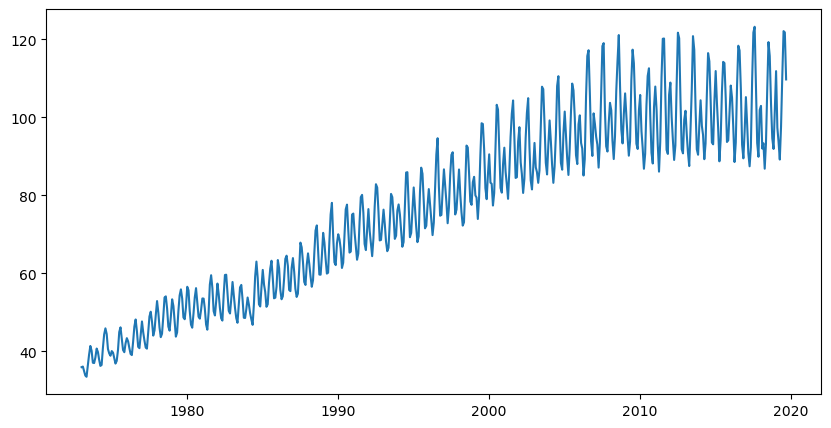

In [12]:
plt.figure(figsize = (10,5))
plt.plot(elect_consum['Energy'])

In [13]:
#Lag and Lead

elect_consum['lag(1)'] = elect_consum['Energy'].shift(1)
elect_consum['lag(2)'] = elect_consum['Energy'].shift(2)

In [14]:
elect_consum['lead(1)'] = elect_consum['Energy'].shift(-1)
elect_consum['lead(2)'] = elect_consum['Energy'].shift(-2)

In [15]:
elect_consum.head()

,Energy,Year,lag(1),lag(2),lead(1),lead(2)
DATE,,,,,,
1973-01-01,35.9728,1973,NaN,NaN,36.1334,35.0625
1973-02-01,36.1334,1973,35.9728,NaN,35.0625,33.8416
1973-03-01,35.0625,1973,36.1334,35.9728,33.8416,33.5107
1973-04-01,33.8416,1973,35.0625,36.1334,33.5107,36.4823
1973-05-01,33.5107,1973,33.8416,35.0625,36.4823,39.1412


In [16]:
#diff

#elect_consum['diff(1)'] = elect_consum['Energy'] - elect_consum['lag(1)']
elect_consum['diff(1)'] = elect_consum['Energy'].diff(1)


In [17]:
elect_consum['rolling_avg(2)'] = elect_consum['Energy'].rolling(2).mean()
elect_consum['rolling_sum(2)'] = elect_consum['Energy'].rolling(2).sum()

In [18]:
elect_consum['rolling_avg(3)'] = elect_consum['Energy'].rolling(3).mean()
elect_consum['rolling_avg(5)'] = elect_consum['Energy'].rolling(5).mean()
elect_consum['rolling_avg(7)'] = elect_consum['Energy'].rolling(7).mean()

In [19]:
elect_consum.head()

,Energy,Year,lag(1),lag(2),lead(1),lead(2),diff(1),rolling_avg(2),rolling_sum(2),rolling_avg(3),rolling_avg(5),rolling_avg(7)
DATE,,,,,,,,,,,,
1973-01-01,35.9728,1973,NaN,NaN,36.1334,35.0625,NaN,NaN,NaN,NaN,NaN,NaN
1973-02-01,36.1334,1973,35.9728,NaN,35.0625,33.8416,0.1606,36.05310,72.1062,NaN,NaN,NaN
1973-03-01,35.0625,1973,36.1334,35.9728,33.8416,33.5107,-1.0709,35.59795,71.1959,35.722900,NaN,NaN
1973-04-01,33.8416,1973,35.0625,36.1334,33.5107,36.4823,-1.2209,34.45205,68.9041,35.012500,NaN,NaN
1973-05-01,33.5107,1973,33.8416,35.0625,36.4823,39.1412,-0.3309,33.67615,67.3523,34.138267,34.9042,NaN


In [20]:
#Rolling Avg
print((35.9728+36.1334)/2)

#Rolling Sum
print(35.9728+36.1334)

36.0531
72.1062


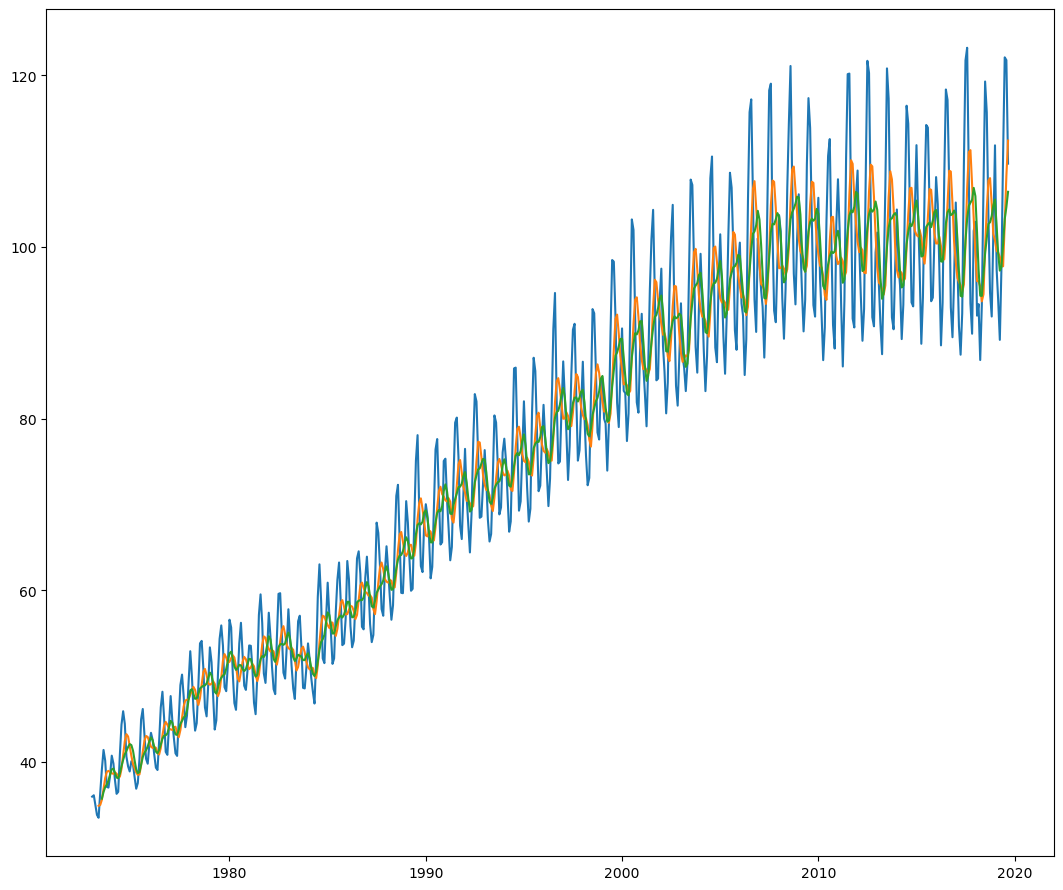

In [21]:
plt.figure(figsize = (13,11))
plt.plot(elect_consum['Energy'])
#plt.plot(elect_consum['rolling_avg(3)'])
plt.plot(elect_consum['rolling_avg(5)'])
plt.plot(elect_consum['rolling_avg(7)'])

###### Exponential Moving Average (ewm)

In [22]:
#Exponential Moving Average (ewm)
# Average taking some weighatge to current value and some weightage to past prediction

In [23]:
elect_consum["Energy_ewm"] = elect_consum["Energy"].ewm(alpha = 0.2, adjust = False).mean()
elect_consum.head()

,Energy,Year,lag(1),lag(2),lead(1),lead(2),diff(1),rolling_avg(2),rolling_sum(2),rolling_avg(3),rolling_avg(5),rolling_avg(7),Energy_ewm
DATE,,,,,,,,,,,,,
1973-01-01,35.9728,1973,NaN,NaN,36.1334,35.0625,NaN,NaN,NaN,NaN,NaN,NaN,35.972800
1973-02-01,36.1334,1973,35.9728,NaN,35.0625,33.8416,0.1606,36.05310,72.1062,NaN,NaN,NaN,36.004920
1973-03-01,35.0625,1973,36.1334,35.9728,33.8416,33.5107,-1.0709,35.59795,71.1959,35.722900,NaN,NaN,35.816436
1973-04-01,33.8416,1973,35.0625,36.1334,33.5107,36.4823,-1.2209,34.45205,68.9041,35.012500,NaN,NaN,35.421469
1973-05-01,33.5107,1973,33.8416,35.0625,36.4823,39.1412,-0.3309,33.67615,67.3523,34.138267,34.9042,NaN,35.039315


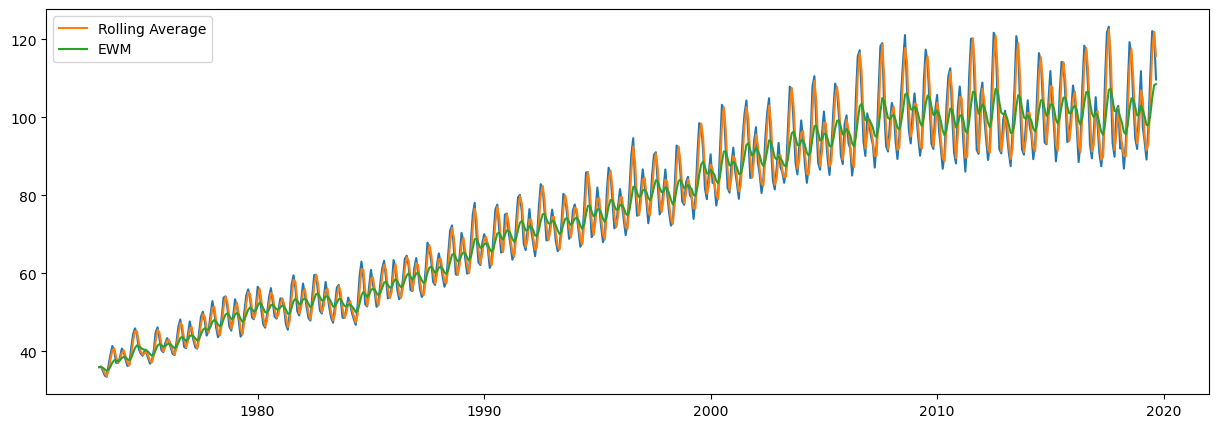

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(elect_consum["Energy"])
plt.plot(elect_consum["rolling_avg(2)"],label = "Rolling Average")
plt.plot(elect_consum["Energy_ewm"], label = "EWM")

plt.legend()

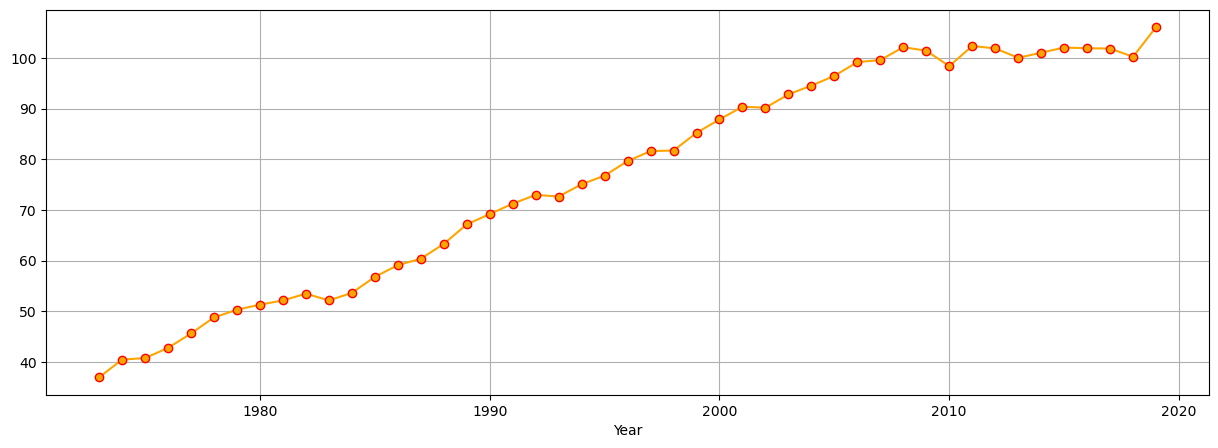

In [25]:
plt.figure(figsize = (15, 5))
elect_consum.groupby("Year").mean()["Energy"].plot(color = 'orange',marker ="o", markeredgecolor = 'red')
plt.grid()

###### Decomposition of Time Series

In [26]:
decom = seasonal_decompose(elect_consum['Energy'], model = 'multiplicative')

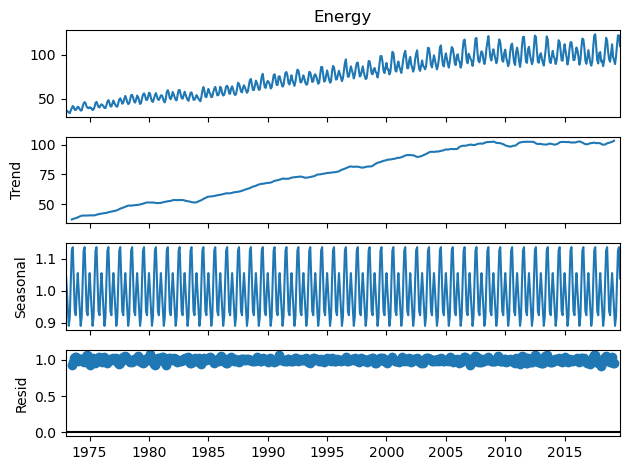

In [27]:
decom.plot()
plt.show()

###### Check the stationarity of the data

In [28]:
def get_adfuller(ts):
    result = pd.Series(adfuller(ts)[0:4],
                       index= ["Test Statistic", "p-value", "lags used", "number of observations"])
    
    return result

In [29]:
get_adfuller(elect_consum['Energy'])

Test Statistic             -1.740593
p-value                     0.410328
lags used                  15.000000
number of observations    545.000000
dtype: float64

###### ACF and PACF

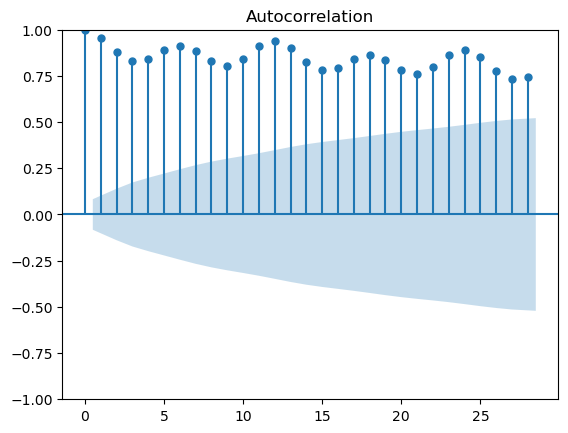

In [30]:
plot_acf(elect_consum['Energy'])
plt.show()

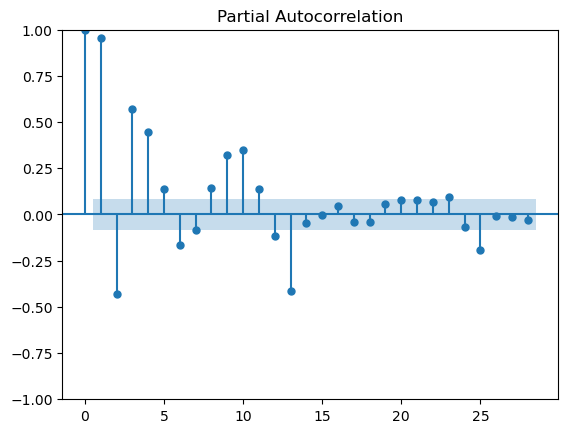

In [31]:
plot_pacf(elect_consum['Energy'])
plt.show()

###### Test-Train Split

In [32]:
elect_consum.shape

(561, 13)

In [33]:
elect_consum.drop(columns = ['Year','lag(1)','lag(2)','lead(1)','lead(2)','diff(1)','rolling_avg(2)','rolling_sum(2)','rolling_avg(3)','rolling_avg(5)','rolling_avg(7)','Energy_ewm'], inplace = True)

In [34]:
train,test = elect_consum[:'2017-12'], elect_consum['2018-01':]

In [35]:
train 

,Energy
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2017-08-01,123.2163
2017-09-01,108.4514
2017-10-01,93.4264


In [36]:
test

,Energy
DATE,
2018-01-01,102.9398
2018-02-01,92.0095
2018-03-01,93.3526
2018-04-01,86.8386
2018-05-01,93.2361
2018-06-01,107.1009
2018-07-01,119.2874
2018-08-01,115.7108
2018-09-01,103.4070


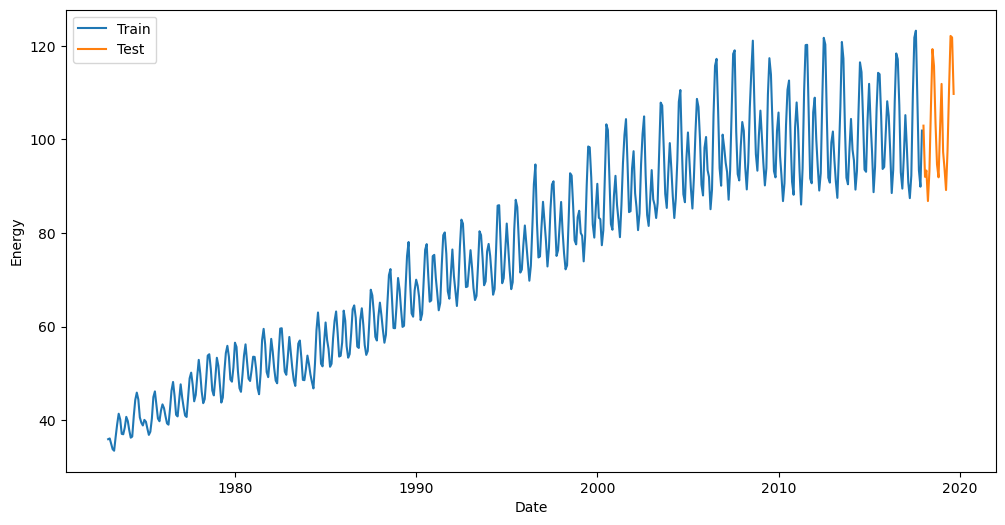

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.legend()
plt.show()

###### Seasonal ARIMA

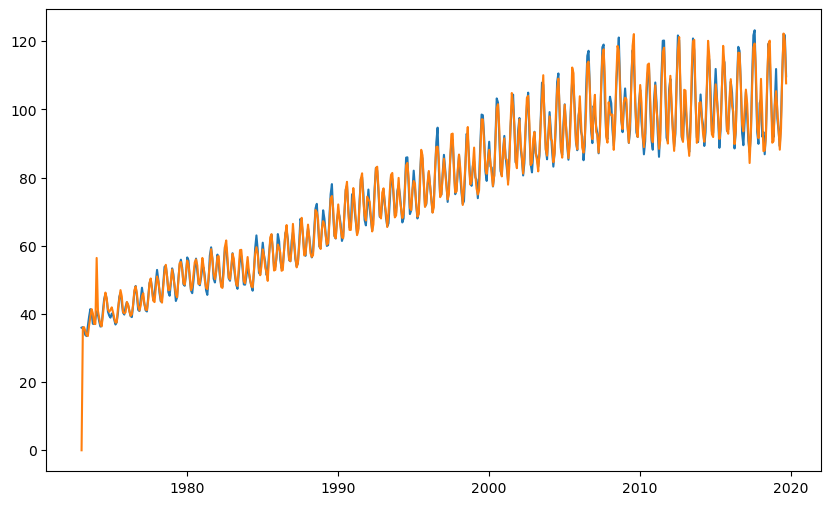

In [45]:
order = (1,1, 1)
seasonal_order = (1, 1, 0, 12) ## P, D, Q, T

model = SARIMAX(elect_consum, order= order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
sarima_preds = model_fit.predict()

plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(elect_consum.index)  , elect_consum)
plt.plot(pd.to_datetime(elect_consum.index),sarima_preds.values)

In [46]:
preds

2018-01-01    109.012618
2018-02-01    102.630004
2018-03-01     94.895732
2018-04-01     89.130964
2018-05-01     93.803601
2018-06-01    110.009530
2018-07-01    121.329481
2018-08-01    121.741620
2018-09-01    108.765093
2018-10-01     93.973840
2018-11-01     90.446234
2018-12-01    100.499777
2019-01-01    108.269802
2019-02-01    101.586022
2019-03-01     94.044859
2019-04-01     89.175350
2019-05-01     93.901712
2019-06-01    110.523055
2019-07-01    122.145355
2019-08-01    122.948635
2019-09-01    109.308859
Freq: MS, Name: predicted_mean, dtype: float64

###### MAE

In [47]:
mean_absolute_error(preds, test)

2.607870781942041

###### RMSE

In [62]:
rmse_sarima = np.sqrt(mean_squared_error(preds, test))
rmse_sarima

3.692992556965988

###### MAPE

In [63]:
mape_sarima = mean_absolute_percentage_error(preds, test)
mape_sarima

0.024794703417190436

In [48]:
train.mean()

Energy    75.66999
dtype: float64

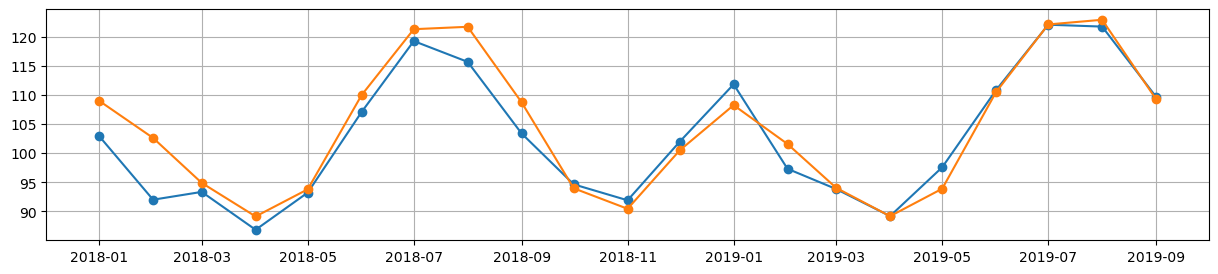

In [49]:
plt.figure(figsize=(15, 3))
plt.plot(pd.to_datetime(test.index), test, label = "actual", marker = 'o')
plt.plot(pd.to_datetime(test.index),preds, label = "prediction", marker = 'o')

plt.grid()

In [52]:
forecast  = pd.DataFrame(model_fit.forecast(steps = 40))

In [53]:
forecast

,predicted_mean
2019-10-01,97.281469
2019-11-01,93.419563
2019-12-01,103.702363
2020-01-01,109.808556
2020-02-01,96.447657
2020-03-01,94.683391
2020-04-01,89.213209
2020-05-01,96.774211
2020-06-01,110.234612
2020-07-01,121.816309


In [56]:
nxt_two_yrs = pd.concat([elect_consum, forecast])
nxt_two_yrs

,Energy,predicted_mean
1973-01-01,35.9728,NaN
1973-02-01,36.1334,NaN
1973-03-01,35.0625,NaN
1973-04-01,33.8416,NaN
1973-05-01,33.5107,NaN
...,...,...
2022-09-01,NaN,109.662833
2022-10-01,NaN,98.306135
2022-11-01,NaN,94.771398
2022-12-01,NaN,104.992008


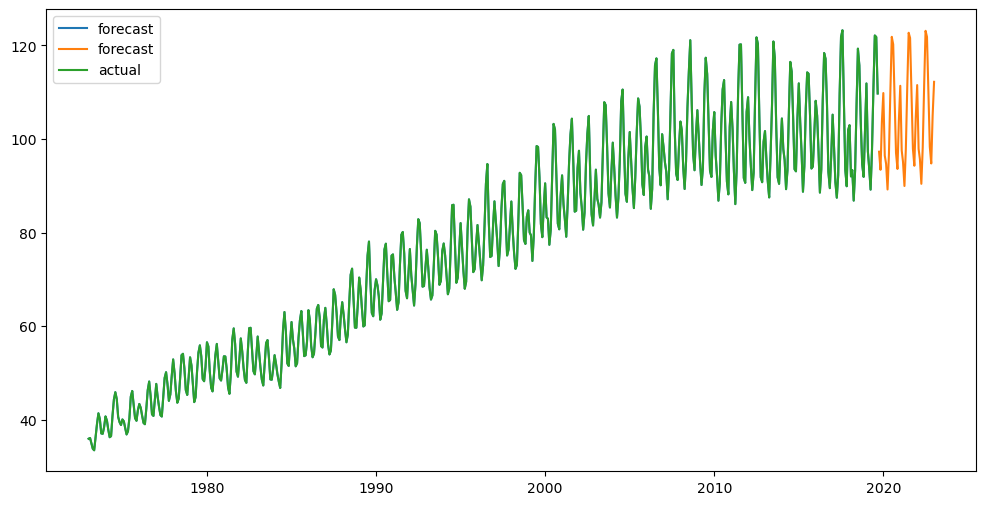

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(nxt_two_yrs.index,nxt_two_yrs, label = "forecast")
plt.plot(elect_consum.index,elect_consum, label = "actual")
plt.legend()